In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11

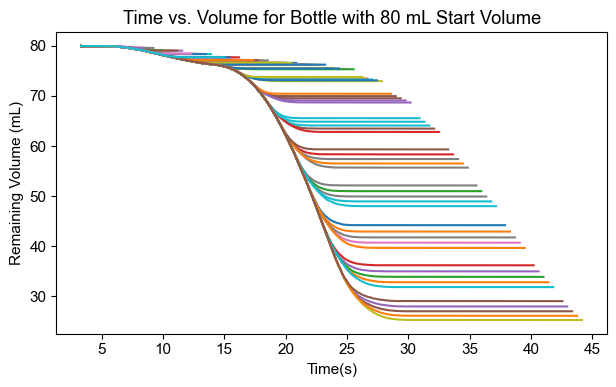

In [5]:
# iterate over folders in CellFlask

# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 4))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if folder_name.startswith('Medium_80'):
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            plt.plot(theta_vs_volume[2000:-2000,2]-30, theta_vs_volume[2000:-2000,0]/400)

# axis labels
plt.ylabel('Remaining Volume (mL)')
plt.xlabel('Time(s)')
# cut off x-axis at 30 s
#plt.xlim(30, 120)
# set y-axis ticks
#plt.xticks(np.arange(0, 90, 20))
plt.title('Time vs. Volume for Bottle with 80 mL Start Volume')
plt.tight_layout()
plt.savefig('plots/4_2_A_time_vs_volume_bottle_50mL.png', dpi=600)
plt.show()


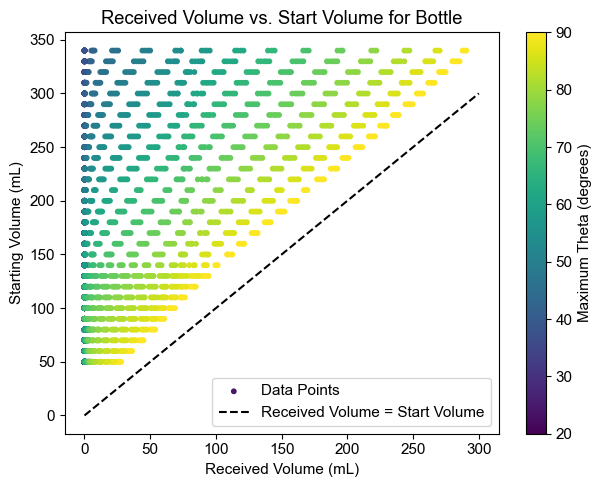

In [40]:
# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium.csv', skiprows=[0,1])

plt.figure(figsize=(6.3, 5))
# make colors of point based on the 7th column with small marker size
plt.scatter(summary_flask.iloc[:,7], summary_flask.iloc[:,5], c=summary_flask.iloc[:,3], s=10)

# plot diagonal line
plt.plot([0, 300], [0, 300], color='black', linestyle='--')

# axis labels
plt.ylabel('Starting Volume (mL)')
plt.xlabel('Received Volume (mL)')
plt.title('Received Volume vs. Start Volume for Bottle')

# explain colorbar
plt.colorbar(label='Maximum Theta (degrees)')
plt.legend(['Data Points','Received Volume = Start Volume'], loc='lower right')
plt.tight_layout()
plt.savefig('plots/4_2_B_received_vs_starting_volume_bottle.png', dpi=600)
plt.show()


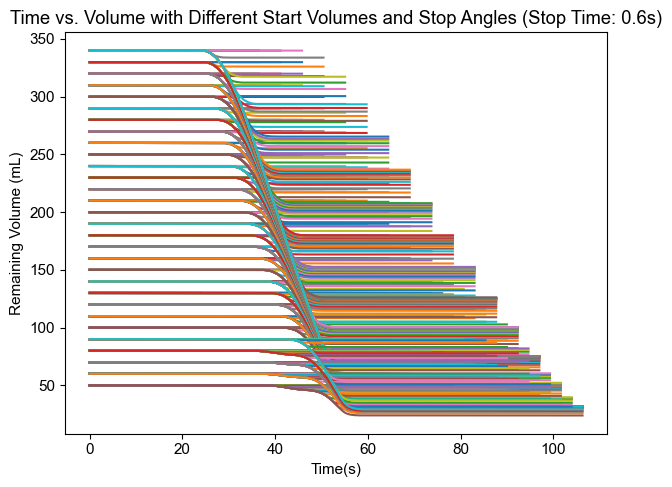

In [41]:
# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 5))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if '600' in folder_name:
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            # make color of plot based on the max of the second column

            plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)
            #plt.legend([max(theta_vs_volume[:,1])])
            #plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)


        # plot the first column of theta_vs_volume against the second column
        #plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/300)

# axis labels
plt.ylabel('Remaining Volume (mL)')
plt.xlabel('Time(s)')
plt.title('Time vs. Volume with Different Start Volumes and Stop Angles (Stop Time: 0.6s)')
plt.tight_layout()
plt.savefig('plots/4_2_C_time_vs_volume_flask_20degrees_bottle.png', dpi=600)
plt.show()


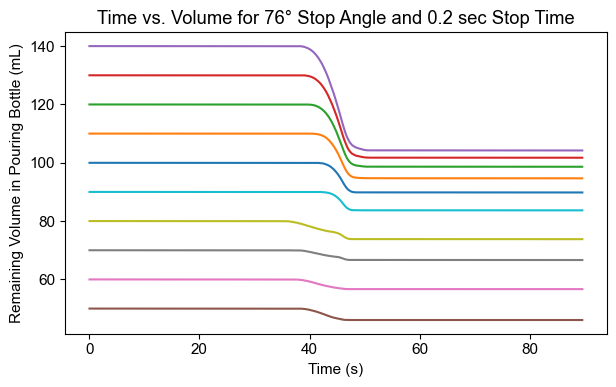

In [42]:
# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 4))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if folder_name.endswith('200_76'):
            # if folder name contains '600'
        #if '600_20' in folder_name:
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            # make color of plot based on the max of the second column

            plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)

# axis labels
# cut plot at x = 22
#plt.xlim(0, 100)
plt.ylabel('Remaining Volume in Pouring Bottle (mL)')
plt.xlabel('Time (s)')
plt.title('Time vs. Volume for 76° Stop Angle and 0.2 sec Stop Time')
plt.tight_layout()
plt.savefig('plots/4_2_D_time_vs_volume_flask_20degrees_200ms_bottle.png', dpi=600)
plt.show()


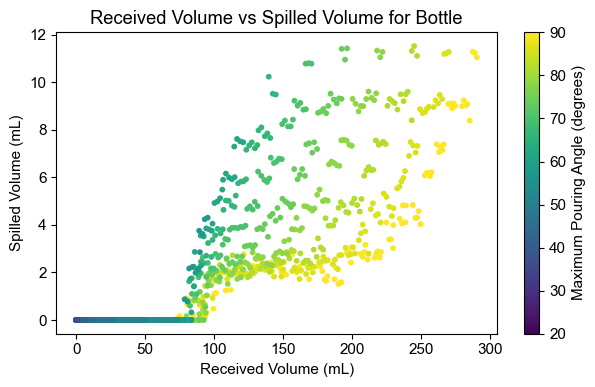

In [36]:
# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium.csv', skiprows=[0,1])

#plt.figure(figsize=(6.3, 5))
# make colors of point based on the 7th column with small marker size
spilled_volume = summary_flask.iloc[:,8]

# -4 until it is 0
spilled_volume = spilled_volume - 8

for i in range(len(spilled_volume)):
    if spilled_volume[i] < 0:
        spilled_volume[i] = 0

input_volume = summary_flask.iloc[:,7]

plt.figure(figsize=(6.3, 4))

# plot the spilled volume against the input volume
plt.scatter(input_volume, spilled_volume, c=summary_flask.iloc[:,3], s=10)

# axis labels
plt.ylabel('Spilled Volume (mL)')
plt.xlabel('Received Volume (mL)')
plt.title('Received Volume vs. Spilled Volume for Bottle')
# explain colorbar
plt.colorbar(label='Maximum Pouring Angle (degrees)')
plt.tight_layout()
plt.savefig('plots/4_2_I_spilled_vs_received_volume_bottle.png', dpi=600)
plt.show()